# <span style="color:darkred">  Esercitazione 3 </span>


### Plain vanilla option pricing 

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1.  By sampling **directly** the final asset price $S(T)$ for a $GBM(r,\sigma^2)$
2.  By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$. As usual, in computing statistical uncertainties, use data blocking.

_______________________________
##### Svolgimento

Per le simulazioni ho usato un numero totale di estrazioni $N = 10000$, suddivisi in 100 blocchi per poter far l'analisi dell'errore.

In [2]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


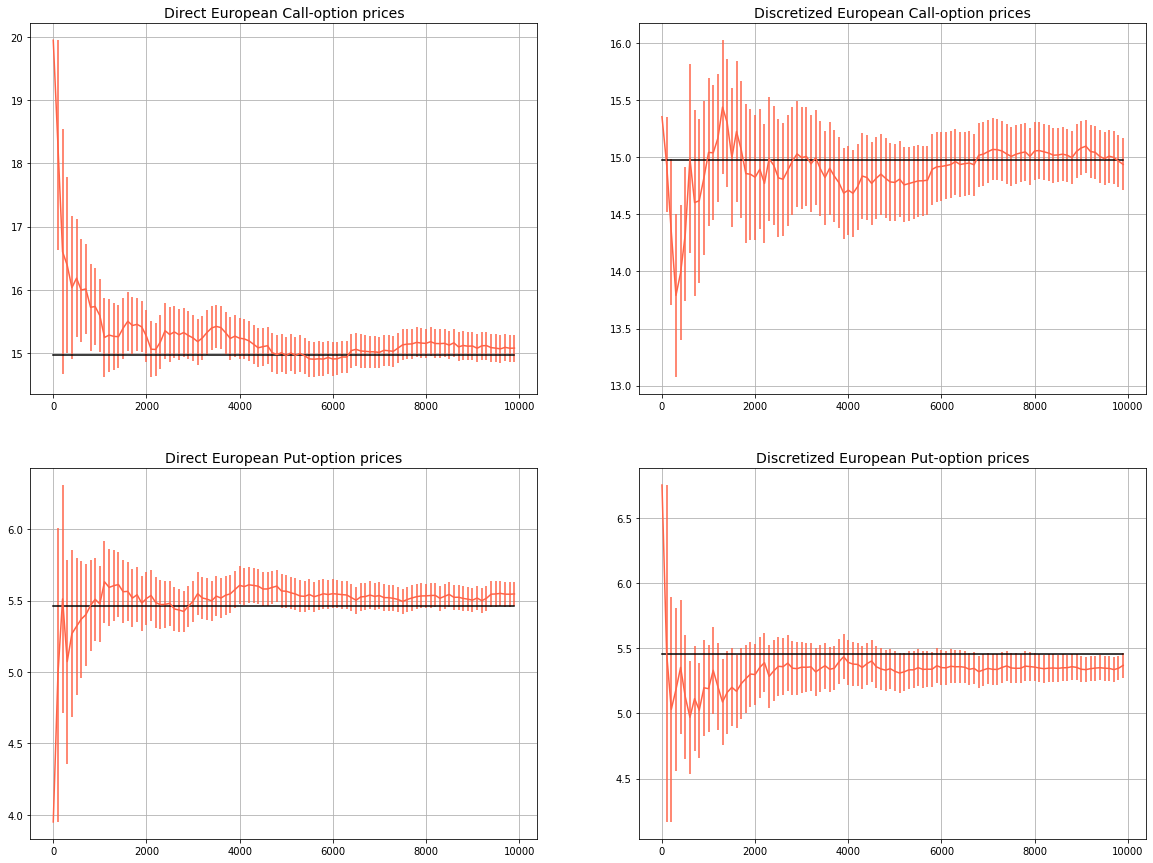

In [4]:
N = 10000 #numero di lanci
M = 100 #numero di blocchi
L = int(N/M)

x=np.arange(M)
y=np.zeros(M)
z=np.zeros(M)
C1, eC1 =  np.loadtxt("Es01/direttoC.dat", usecols=(0,1), delimiter=' ', unpack='true')
C2, eC2 =  np.loadtxt("Es01/progressivoC.dat", usecols=(0,1), delimiter=' ', unpack='true')
P1, eP1 =  np.loadtxt("Es01/direttoP.dat", usecols=(0,1), delimiter=' ', unpack='true')
P2, eP2 =  np.loadtxt("Es01/progressivoP.dat", usecols=(0,1), delimiter=' ', unpack='true')

x*=L
y+=call
z+=put

fig, canvas = plt.subplots(2, 2, figsize=(20,15))

canvas[0,0].errorbar(x,C1, yerr=eC1, color="tomato")
canvas[0,0].plot(x, y, color="black")
canvas[0,0].set_title('Direct European Call-option prices', fontsize= 14)
canvas[0,0].grid(True)

canvas[0,1].errorbar(x,C2, yerr=eC2, color="tomato")
canvas[0,1].plot(x, y, color="black")
canvas[0,1].set_title('Discretized European Call-option prices', fontsize= 14)
canvas[0,1].grid(True)

canvas[1,0].errorbar(x,P1, yerr=eP1, color="tomato")
canvas[1,0].plot(x, z, color="black")
canvas[1,0].set_title('Direct European Put-option prices', fontsize= 14)
canvas[1,0].grid(True)

canvas[1,1].errorbar(x,P2, yerr=eP2, color="tomato")
canvas[1,1].plot(x, z, color="black")
canvas[1,1].set_title('Discretized European Put-option prices', fontsize= 14)
canvas[1,1].grid(True)

plt.show()

Nei grafici precedenti sono raffigurati, in prima riga, i Call-options prices in funzione del numero totale di tiri. Nella seconda riga invece sono presenti i Put-option prices.

Si osserva per tutti e 4 i grafici che il valore misurato tramite la simulazione MonteCarlo è compatibile con i valori attesi dalla teoria di Black-Scholes (in figura segnati in nero): 
* call:  14.975790778311286 
* put:  5.4595325819072364.

La compatibilità avviene sia nel caso del calcolo diretto si nel calcolo progressivo.